## Enviroment and data preparation

In [0]:
from fastai.vision import *

###images.google
getting images from Google Images by opening the browser which will save the URLs of all the images needed for the dataset.

By pressing Shift Ctrl j (on Windows/Linux), the Console appears.
Copying and pasting the javascript code below, it allows downloading the urls in this page for the images appear.

Saving it to the local machine as a txt file.

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Creating directories for the downloadable images with the proper labels as names for the directories.

In [0]:
#creating directory for each category
folders = ['skates', 'shoes', 'rollerblades', 'soccer_shoes']
path = Path('/content/data/footwear')
for folder in folders:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [4]:
#checking directories
path.ls()

[PosixPath('/content/data/footwear/soccer_shoes'),
 PosixPath('/content/data/footwear/shoes'),
 PosixPath('/content/data/footwear/skates'),
 PosixPath('/content/data/footwear/rollerblades')]

In [7]:
#uploading urls from local machine and downloading images to colab machine
from google.colab import files
!pwd

/content/data/footwear/soccer_shoes


In [8]:
%cd /content/data/footwear/soccer_shoes
files.upload()
path = Path('/content/data/footwear/soccer_shoes/url_soccer_shoes.txt')
dest = Path('/content/data/footwear/soccer_shoes')
download_images(path, dest = dest, max_pics=200)

/content/data/footwear/soccer_shoes


Saving url_soccer_shoes.txt to url_soccer_shoes.txt


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [9]:
%cd /content/data/footwear/shoes
files.upload()
path = Path('/content/data/footwear/shoes/url_shoes.txt')
dest = Path('/content/data/footwear/shoes')
download_images(path, dest = dest, max_pics=200)

/content/data/footwear/shoes


Saving url_shoes.txt to url_shoes.txt


In [10]:
%cd /content/data/footwear/skates
files.upload()
path = Path('/content/data/footwear/skates/url_skates.txt')
dest = Path('/content/data/footwear/skates')
download_images(path, dest = dest, max_pics=200)

/content/data/footwear/skates


Saving url_skates.txt to url_skates.txt


In [11]:
%cd /content/data/footwear/rollerblades
files.upload()
path = Path('/content/data/footwear/rollerblades/url_rollerblades.txt')
dest = Path('/content/data/footwear/rollerblades')
download_images(path, dest = dest, max_pics=200)

/content/data/footwear/rollerblades


Saving url_rollerblades.txt to url_rollerblades.txt


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [15]:
%cd ..

/content/data/footwear


images for the different categories are now saved on the Colab machine, some of them do have errors opening, so they should be removed firstly.

In [12]:
classes = ['shoes', 'skates', 'rollerblades', 'soccer_shoes']
path = Path('/content/data/footwear/')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

shoes


skates


rollerblades


soccer_shoes


## View data

In [0]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['rollerblades', 'shoes', 'skates', 'soccer_shoes']

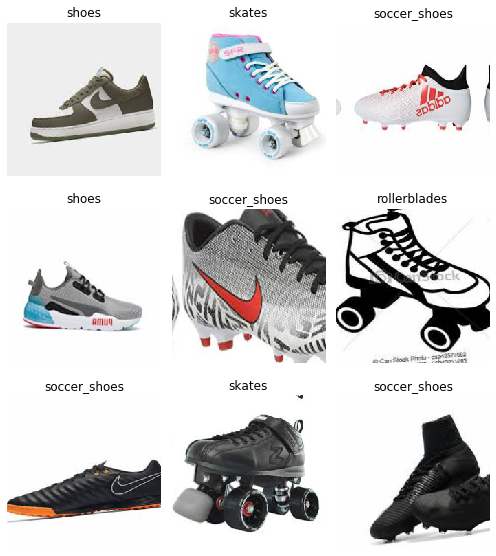

In [19]:
data.show_batch(rows=3, figsize=(7,8))

Some of the labels are not right. Leaving them for now.

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['rollerblades', 'shoes', 'skates', 'soccer_shoes'], 4, 256, 64)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [22]:
learn.fit_one_cycle(5)

In [0]:
#saving model's weights
learn.save('stage-1')

In [0]:
#unfreezing weights
learn.unfreeze()

In [25]:
#finding the proper learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


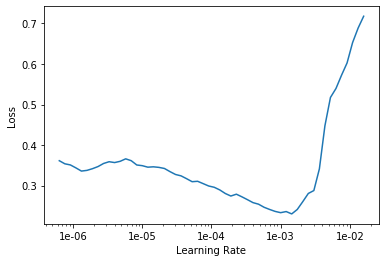

In [26]:
learn.recorder.plot()

In [27]:
#training according to the best range of learning rates
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

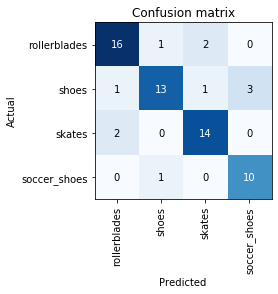

In [31]:
interp.plot_confusion_matrix()

In [32]:
#from confusion matrix, there seems to be many things were mistakenly predict
#getting most confused items with at least 2 occurances
interp.most_confused(2)

[('shoes', 'soccer_shoes', 3),
 ('rollerblades', 'skates', 2),
 ('skates', 'rollerblades', 2)]

## Cleaning Up

Some of our top losses aren't due to bad performance by the model. There are images in the data set that shouldn't be as seen in the beginning. We can prune top losses, removing photos that don't belong.

Google Colab does not support the `ImageCleaner` widget from `fastai.widgets`, that's why the clean up process will be continued on the local machine.

Running the other file till reaching the 'learn' part where 'stage-2' can be loaded without the need of fitting the dataset to the model(takes long time speccially if the machine has a CPU)

Before running the other file, installing pytorch and fastai is required. Instructions followed in this link https://medium.com/@pierre_guillou/how-to-install-fastai-v1-on-windows-10-ca1bc370dce4 

Download 'stage-2' to local machine.
Running the other file to get images cleaned.

In [33]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##after having the clean images prepared on local machine

In [34]:
!mkdir clean
%cd clean

/content/data/footwear/clean


In [35]:
#uploading tarfile from local machine
files.upload()

Saving clean_data.tar to clean_data.tar


{'clean_data.tar': b'\x1f\x8b\x08\x00\xba\x1e\x16^\x00\x03\xec\xfd\x05p%\xbd\x92.\x8a.3333333333C\x1b\xdb\xcc\xcc\xcc\x0cm\xa6633\xb3\xddmf\xa6\xd7\xff\x9e=gf\xf6\x9e9\'n\xc4\xb9\x13\xef\xc5\x9b\\\xb2TUYV\x95\x94U\x922\xbfJ\xc9\xd5\xd9\xc8\xca\x9e\x01\xf0\xff*1\xfe!\x0e\x0e\x8e\xbfR&\x0e6\xc6\x7f\x9f\xfe+\x01\x98X\xd8\x19\xd9X\x998\x18Y\xd9\x01\x8cLL\xccL\x1c\x00B\xb6\xffwo\xeb_\xc8\xcd\xc5\xd5\xc8\x99\x90\x10\xe0m\xe6ed\xfa\xbf9\xef\xff\xc4\xff\xffQr\xfd\x9b\xfc\x9d\x1dlm\xcd\x9c\x8dm\x8dL\xcd\\\xfe\xef?\x0c\xffO\xe4\xcf\xc4\xcc\xf6G\xfe,\xec\xec\xff#\xff\xff\x16\xfaO\xe4\xffw\x910\xd1[;Z\xfc_\xb9\xc6\xff^\xfeL\xecLL\xff(\x7f6f6\x16\x00!\xe3\xff\x95\xab\xff\x1f\xe8\xff\xcf\xe5\xff\xb5\xfa\xb5\x0b@\x94\x16\x97\x12\x07\x00\x01\x01\x00@\x7f~\x80\xaf\r\xc0w\x00\x148\x042\n2\x1a22\n:\x1a\x1a:\x06\x166\x06&\x1a\x06&\x06\x06\x0e666&&\x16&!\x06>\x1e%!\x0e>\x19\x0e\x1a\x1a1\x13\x11\x19\x15\r===&\x01\x0b\'\x0b\x1d\x07%\x1d=\r\x10444<\x1c<\x06""\x06\r>\x01>\x1d\x13\xdd_D\xff\xe7\x8f\xe6\xaf\r\x1

In [0]:
#untarring the file
!tar xvf clean_data.tar

Go to files, data, footwear, models, and download stage-2.pth to your local machine. You'll need that running on the notebook on Jupyter notebook. Preparing for this download might take some time.
After running the image cleaning process in the local machine, upload the cleaned.csv file in drive and read it.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
path = Path('/content/data/footwear/clean/')

In [0]:
np.random.seed(1)
data_cleaned = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

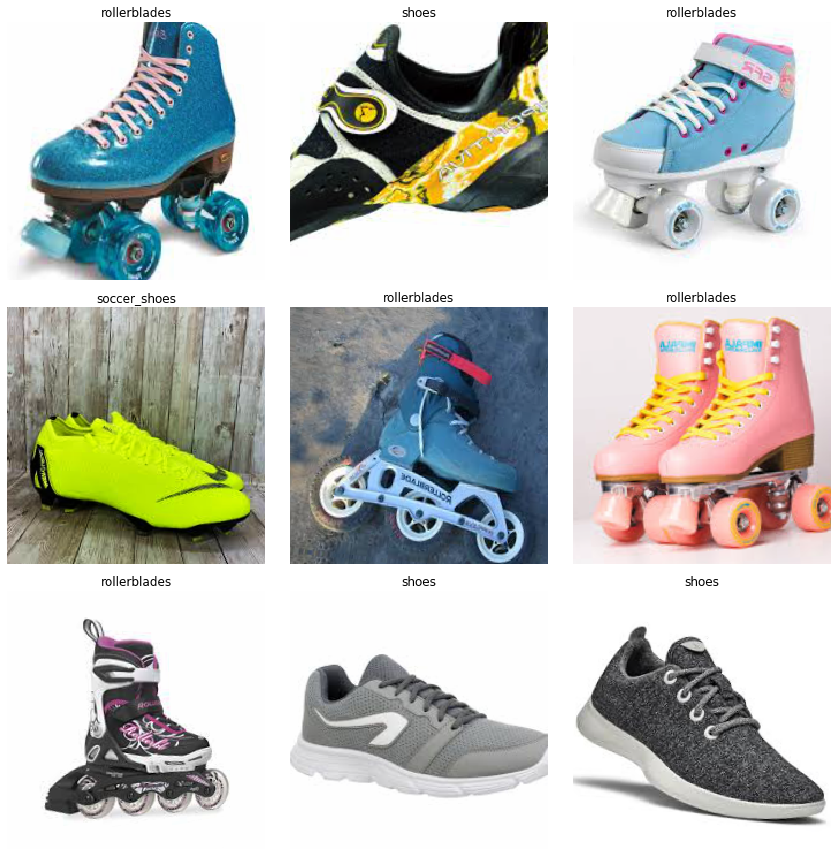

In [40]:
data_cleaned.show_batch(rows = 3)

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(data_cleaned, models.resnet34, metrics=error_rate)

In [42]:
learn_cln.fit_one_cycle(7)

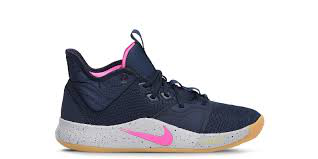

In [44]:
#picking any file from the validation set to get a prediction of the category
img = open_image(path/'valid/shoes'/'00000002.jpg')
img

In [45]:
learn.predict(img)[0]

Category shoes